In [2]:
import google.colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# SECTION 1: Install YOLOv8 (Ultralytics)
# ============================================================
!pip install -q ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 31.4 MB/s eta 0:00:00


#Models


Link:https://github.com/ultralytics/ultralytics

In [4]:
# ============================================================
# YOLOv8 Classification Training
# ============================================================
# Make sure your dataset is structured like this:
# Image_classification/
# ├── train/
# │   ├── class1/
# │   ├── class2/
# │   └── class3/
# └── test/
#     ├── class1/
#     ├── class2/
#     └── class3/

from ultralytics import YOLO
import torch

# Check device
device = 0 if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

# Dataset path
DATASET_ROOT = "/content/drive/MyDrive/Pytorch/Image_classification"

# Load pretrained YOLOv8 classification model
model = YOLO("yolov8n-cls.pt")  # nano version (fastest)

# Train the model
model.train(
    data=DATASET_ROOT,   # dataset root folder
    epochs=100,          # number of epochs
    imgsz=224,           # image size
    batch=32,            # batch size
    device=device        # GPU if available
)


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Using device: 0
Ultralytics 8.4.7 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, angle=1.0, augment=False, auto_augment=randaugment, batch=32, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/Pytorch/Image_classification, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_

ultralytics.utils.metrics.ClassifyMetrics object with attributes:

confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7a28549ee3f0>
curves: []
curves_results: []
fitness: 0.9866666793823242
keys: ['metrics/accuracy_top1', 'metrics/accuracy_top5']
results_dict: {'metrics/accuracy_top1': 0.9733333587646484, 'metrics/accuracy_top5': 1.0, 'fitness': 0.9866666793823242}
save_dir: PosixPath('/content/runs/classify/train')
speed: {'preprocess': 0.14604171999963, 'inference': 0.40610431999994034, 'loss': 0.0002572933332582276, 'postprocess': 0.0003746533351052979}
task: 'classify'
top1: 0.9733333587646484
top5: 1.0

In [5]:
# ============================================================
# YOLOv8 Evaluation
# ============================================================
# Make sure the test folder contains images for evaluation

metrics = model.val(
    data=DATASET_ROOT,
    imgsz=224,
    conf=True   # generates confusion matrix automatically
)

print("Evaluation metrics:")
print(metrics)


Ultralytics 8.4.7 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8n-cls summary (fused): 30 layers, 1,438,723 parameters, 0 gradients, 3.3 GFLOPs
WARNING ⚠️ Dataset 'split=val' not found, using 'split=test' instead.
train: /content/drive/MyDrive/Pytorch/Image_classification/train... found 225 images in 3 classes ✅ 
val: /content/drive/MyDrive/Pytorch/Image_classification/test... found 75 images in 3 classes ✅ 
test: /content/drive/MyDrive/Pytorch/Image_classification/test... found 75 images in 3 classes ✅ 
val: Fast image access ✅ (ping: 0.5±0.4 ms, read: 17.6±11.6 MB/s, size: 53.9 KB)
val: Scanning /content/drive/MyDrive/Pytorch/Image_classification/test... 75 images, 0 corrupt: 100% ━━━━━━━━━━━━ 75/75 24.2Mit/s 0.0s
               classes   top1_acc   top5_acc: 100% ━━━━━━━━━━━━ 5/5 2.6it/s 1.9s
                   all      0.973          1
Speed: 1.0ms preprocess, 3.6ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to /content/runs/classify/val

In [9]:
import os
from ultralytics import YOLO
import torch
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score
import numpy as np
import os
import random
from PIL import Image
# ============================================================
# Confusion Matrix Visualization
# ============================================================

def plot_confusion_matrix(y_true, y_pred, class_names):
    """Plot confusion matrix"""
    cm = confusion_matrix(y_true, y_pred)

    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names,
                yticklabels=class_names)
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.tight_layout()
    plt.show()

    return cm

# Get class names
test_path = os.path.join(DATASET_ROOT, 'test')
class_names = sorted(os.listdir(test_path))
print(f"Classes: {class_names}")


Classes: ['pizza', 'steak', 'sushi']



TRAINING SET ACCURACY
Training Accuracy: 1.0000 (100.00%)

TEST SET ACCURACY
Test Accuracy: 0.9733 (97.33%)

CONFUSION MATRIX (Test Set)


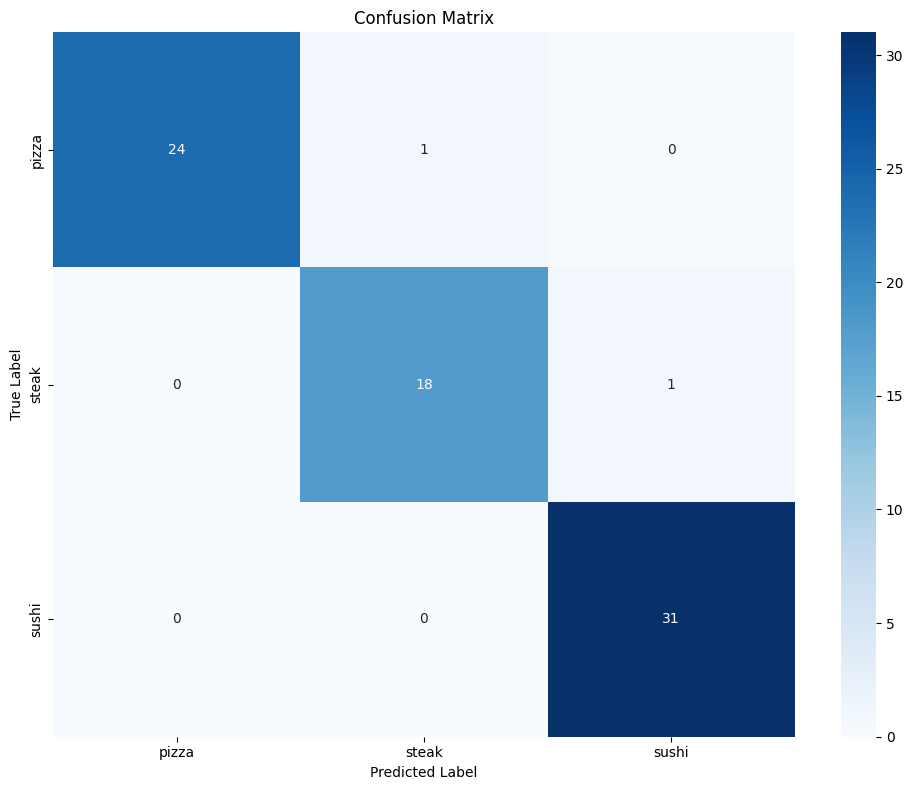


RANDOM IMAGE PREDICTIONS FROM EACH CLASS

Class: pizza
  Image: 3092704.jpg
  Actual Class: pizza
  Predicted Class: pizza
  Confidence: 99.94%
  Correct: ✓

Class: steak
  Image: 296375.jpg
  Actual Class: steak
  Predicted Class: steak
  Confidence: 99.68%
  Correct: ✓

Class: sushi
  Image: 207578.jpg
  Actual Class: sushi
  Predicted Class: sushi
  Confidence: 99.83%
  Correct: ✓


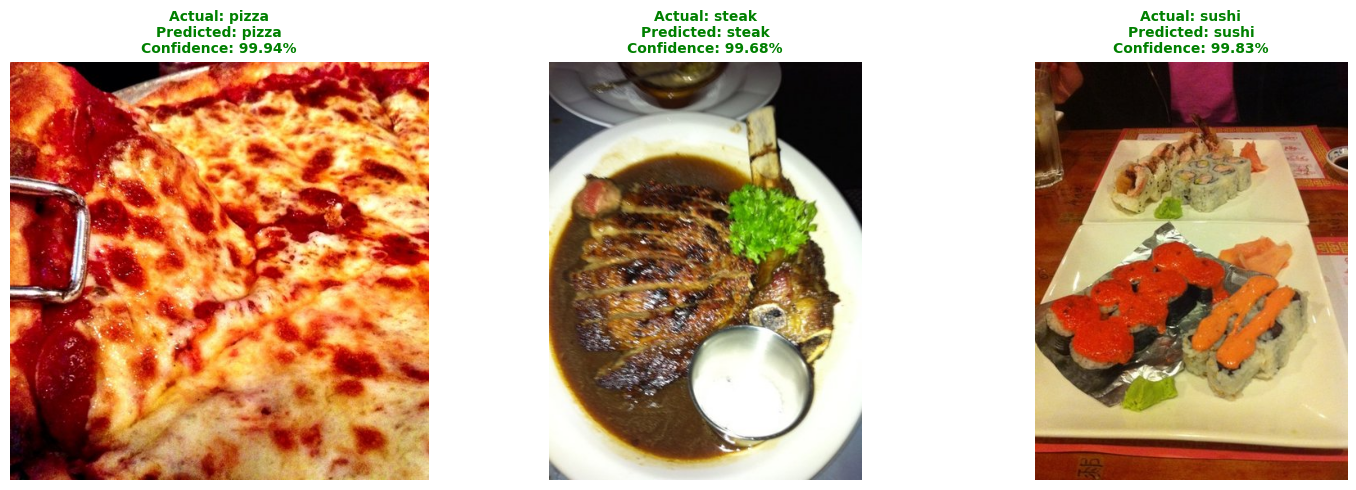


SUMMARY
Total Classes: 3
Class Names: ['pizza', 'steak', 'sushi']

Training Accuracy: 100.00%
Test Accuracy: 97.33%

Confusion Matrix:
[[24  1  0]
 [ 0 18  1]
 [ 0  0 31]]


In [10]:
# ============================================================
# Calculate Accuracy on Training and Test Sets
# ============================================================

def calculate_accuracy(model, data_path, split='train'):
    """Calculate accuracy for a given dataset split"""
    y_true = []
    y_pred = []

    split_path = os.path.join(data_path, split)
    classes = sorted(os.listdir(split_path))

    for class_idx, class_name in enumerate(classes):
        class_folder = os.path.join(split_path, class_name)
        image_files = [f for f in os.listdir(class_folder)
                       if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

        for img_file in image_files:
            img_path = os.path.join(class_folder, img_file)

            # Predict
            results = model(img_path, verbose=False)
            pred_class = results[0].probs.top1

            y_true.append(class_idx)
            y_pred.append(pred_class)

    accuracy = accuracy_score(y_true, y_pred)
    return accuracy, y_true, y_pred

print("\n" + "="*60)
print("TRAINING SET ACCURACY")
print("="*60)
train_acc, train_true, train_pred = calculate_accuracy(model, DATASET_ROOT, 'train')
print(f"Training Accuracy: {train_acc:.4f} ({train_acc*100:.2f}%)")

print("\n" + "="*60)
print("TEST SET ACCURACY")
print("="*60)
test_acc, test_true, test_pred = calculate_accuracy(model, DATASET_ROOT, 'test')
print(f"Test Accuracy: {test_acc:.4f} ({test_acc*100:.2f}%)")

# Plot confusion matrix for test set
print("\n" + "="*60)
print("CONFUSION MATRIX (Test Set)")
print("="*60)
cm = plot_confusion_matrix(test_true, test_pred, class_names)

# ============================================================
# Random Image Prediction from Each Class
# ============================================================

print("\n" + "="*60)
print("RANDOM IMAGE PREDICTIONS FROM EACH CLASS")
print("="*60)

test_path = os.path.join(DATASET_ROOT, 'test')
num_classes = len(class_names)

# Create subplots
fig, axes = plt.subplots(1, num_classes, figsize=(5*num_classes, 5))
if num_classes == 1:
    axes = [axes]

for idx, class_name in enumerate(class_names):
    class_folder = os.path.join(test_path, class_name)
    image_files = [f for f in os.listdir(class_folder)
                   if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

    # Select random image
    random_image = random.choice(image_files)
    img_path = os.path.join(class_folder, random_image)

    # Predict
    results = model(img_path, verbose=False)
    pred_class_idx = results[0].probs.top1
    pred_class_name = class_names[pred_class_idx]
    confidence = results[0].probs.top1conf.item()

    # Load and display image
    img = Image.open(img_path)
    axes[idx].imshow(img)
    axes[idx].axis('off')

    # Set title with prediction info
    color = 'green' if pred_class_name == class_name else 'red'
    axes[idx].set_title(
        f"Actual: {class_name}\n"
        f"Predicted: {pred_class_name}\n"
        f"Confidence: {confidence:.2%}",
        color=color,
        fontsize=10,
        weight='bold'
    )

    # Print details
    print(f"\nClass: {class_name}")
    print(f"  Image: {random_image}")
    print(f"  Actual Class: {class_name}")
    print(f"  Predicted Class: {pred_class_name}")
    print(f"  Confidence: {confidence:.2%}")
    print(f"  Correct: {'✓' if pred_class_name == class_name else '✗'}")

plt.tight_layout()
plt.show()

# ============================================================
# Summary Statistics
# ============================================================

print("\n" + "="*60)
print("SUMMARY")
print("="*60)
print(f"Total Classes: {num_classes}")
print(f"Class Names: {class_names}")
print(f"\nTraining Accuracy: {train_acc*100:.2f}%")
print(f"Test Accuracy: {test_acc*100:.2f}%")
print(f"\nConfusion Matrix:\n{cm}")


TRAINING SET - PER-CLASS ACCURACY

PER-CLASS ACCURACY

Class: pizza
  Total samples: 78
  Correct predictions: 78
  Incorrect predictions: 0
  Accuracy: 1.0000 (100.00%)

Class: steak
  Total samples: 75
  Correct predictions: 75
  Incorrect predictions: 0
  Accuracy: 1.0000 (100.00%)

Class: sushi
  Total samples: 72
  Correct predictions: 72
  Incorrect predictions: 0
  Accuracy: 1.0000 (100.00%)

TEST SET - PER-CLASS ACCURACY

PER-CLASS ACCURACY

Class: pizza
  Total samples: 25
  Correct predictions: 24
  Incorrect predictions: 1
  Accuracy: 0.9600 (96.00%)

Class: steak
  Total samples: 19
  Correct predictions: 18
  Incorrect predictions: 1
  Accuracy: 0.9474 (94.74%)

Class: sushi
  Total samples: 31
  Correct predictions: 31
  Incorrect predictions: 0
  Accuracy: 1.0000 (100.00%)


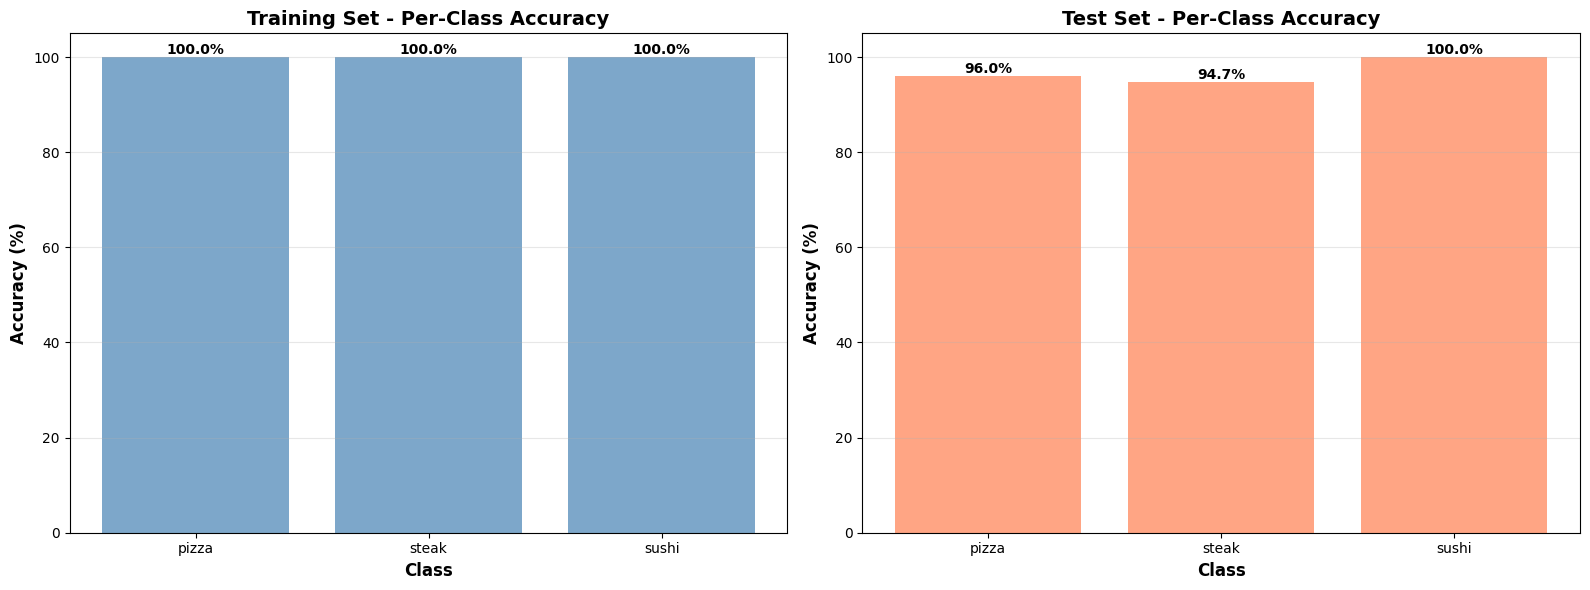


COMPARISON TABLE: TRAIN vs TEST ACCURACY BY CLASS
Class                Train Acc       Test Acc        Difference     
-----------------------------------------------------------------
pizza                100.00%          96.00%          +4.00%
steak                100.00%          94.74%          +5.26%
sushi                100.00%         100.00%          +0.00%

OVERALL STATISTICS
Average Training Accuracy: 100.00%
Average Test Accuracy: 96.91%
Best Performing Class (Test): sushi (100.00%)
Worst Performing Class (Test): steak (94.74%)


In [11]:
# ============================================================
# Per-Class Accuracy Calculation
# ============================================================

def calculate_per_class_accuracy(y_true, y_pred, class_names):
    """Calculate accuracy for each class separately"""

    print("\n" + "="*60)
    print("PER-CLASS ACCURACY")
    print("="*60)

    per_class_stats = {}

    for class_idx, class_name in enumerate(class_names):
        # Get indices where true class is this class
        class_mask = np.array(y_true) == class_idx

        # Get predictions for this class
        true_labels = np.array(y_true)[class_mask]
        pred_labels = np.array(y_pred)[class_mask]

        # Calculate metrics
        total_samples = len(true_labels)
        correct_predictions = np.sum(true_labels == pred_labels)
        class_accuracy = correct_predictions / total_samples if total_samples > 0 else 0

        per_class_stats[class_name] = {
            'total': total_samples,
            'correct': correct_predictions,
            'incorrect': total_samples - correct_predictions,
            'accuracy': class_accuracy
        }

        print(f"\nClass: {class_name}")
        print(f"  Total samples: {total_samples}")
        print(f"  Correct predictions: {correct_predictions}")
        print(f"  Incorrect predictions: {total_samples - correct_predictions}")
        print(f"  Accuracy: {class_accuracy:.4f} ({class_accuracy*100:.2f}%)")

    return per_class_stats

# Calculate per-class accuracy for training set
print("\n" + "="*60)
print("TRAINING SET - PER-CLASS ACCURACY")
print("="*60)
train_per_class = calculate_per_class_accuracy(train_true, train_pred, class_names)

# Calculate per-class accuracy for test set
print("\n" + "="*60)
print("TEST SET - PER-CLASS ACCURACY")
print("="*60)
test_per_class = calculate_per_class_accuracy(test_true, test_pred, class_names)

# ============================================================
# Visualize Per-Class Accuracy
# ============================================================

# Create bar plot for test set per-class accuracy
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Training set
train_accuracies = [train_per_class[cls]['accuracy'] * 100 for cls in class_names]
bars1 = ax1.bar(class_names, train_accuracies, color='steelblue', alpha=0.7)
ax1.set_xlabel('Class', fontsize=12, fontweight='bold')
ax1.set_ylabel('Accuracy (%)', fontsize=12, fontweight='bold')
ax1.set_title('Training Set - Per-Class Accuracy', fontsize=14, fontweight='bold')
ax1.set_ylim(0, 105)
ax1.grid(axis='y', alpha=0.3)

# Add value labels on bars
for bar in bars1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.1f}%',
             ha='center', va='bottom', fontweight='bold')

# Test set
test_accuracies = [test_per_class[cls]['accuracy'] * 100 for cls in class_names]
bars2 = ax2.bar(class_names, test_accuracies, color='coral', alpha=0.7)
ax2.set_xlabel('Class', fontsize=12, fontweight='bold')
ax2.set_ylabel('Accuracy (%)', fontsize=12, fontweight='bold')
ax2.set_title('Test Set - Per-Class Accuracy', fontsize=14, fontweight='bold')
ax2.set_ylim(0, 105)
ax2.grid(axis='y', alpha=0.3)

# Add value labels on bars
for bar in bars2:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.1f}%',
             ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# ============================================================
# Comparison Table
# ============================================================

print("\n" + "="*60)
print("COMPARISON TABLE: TRAIN vs TEST ACCURACY BY CLASS")
print("="*60)
print(f"{'Class':<20} {'Train Acc':<15} {'Test Acc':<15} {'Difference':<15}")
print("-" * 65)

for class_name in class_names:
    train_acc = train_per_class[class_name]['accuracy'] * 100
    test_acc = test_per_class[class_name]['accuracy'] * 100
    diff = train_acc - test_acc

    print(f"{class_name:<20} {train_acc:>6.2f}%{'':<8} {test_acc:>6.2f}%{'':<8} {diff:>+6.2f}%")

print("\n" + "="*60)
print("OVERALL STATISTICS")
print("="*60)
avg_train_acc = np.mean(train_accuracies)
avg_test_acc = np.mean(test_accuracies)
print(f"Average Training Accuracy: {avg_train_acc:.2f}%")
print(f"Average Test Accuracy: {avg_test_acc:.2f}%")
print(f"Best Performing Class (Test): {class_names[np.argmax(test_accuracies)]} ({max(test_accuracies):.2f}%)")
print(f"Worst Performing Class (Test): {class_names[np.argmin(test_accuracies)]} ({min(test_accuracies):.2f}%)")